# Binomial trees 




##### In this study, the studies of ***John C. Hull*** will be benefited and explained more clearly. There will also be a 101 tutorial to be supplemented with some python implementations.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


#  Binomial Trees
Binomial trees are a type of mathematical model used to price financial instruments, particularly options. They involve constructing a tree of possible stock price movements over time and using probability theory to calculate the expected value of the option at each point in the tree. The binomial tree model is a popular and intuitive method for option pricing, especially for European-style options.

This is a diagram representing different possible paths that might be followed by the stock price over the life of an option. The underlying assumption is that the stock price follows a ***random walk***. In each time step,it has a certain probability of moving up by a certain percentage amount and a certain probability of moving down by
a certain percentage amount.


Binomial trees can be used in conjunction with the Black-Scholes or Merton models to price options. The **Black-Scholes** model is a mathematical formula that can be used to calculate the theoretical price of a European call or put option. In a binomial tree with the **Black-Scholes** model, the up and down movements in the stock price are calculated based on the model's assumptions about volatility and other factors.

The **Merton model** is a variation of the **Black-Scholes** model that takes into account the possibility of default by the underlying asset, such as a bond or stock. In a binomial tree with the Merton model, the probability of default is factored into the calculation of the stock price movements over time, and the option price is adjusted accordingly.

Using binomial trees with the **Black-Scholes** or **Merton models** can provide a more accurate and realistic valuation of options than using the models alone, especially for **American-style** options that allow for early exercise.

### A ONE-STEP BINOMIAL MODEL AND A NO-ARBITRAGE ARGUMENT



A one-step binomial model is a simple mathematical framework used to price financial derivatives, such as options, in which the underlying asset can take one of two possible values at a future time. The model assumes that the asset can move up or down with known probabilities, and that the risk-free interest rate is constant.

A no-arbitrage argument is used to show that the price of an option in a one-step binomial model is unique and consistent with the principle of **no-arbitrage**, which states that it is not possible to make a riskless profit by buying and selling assets. If a derivative is priced incorrectly, it would create an opportunity for an arbitrageur to profit without taking any risk, which would be inconsistent with the **no-arbitrage** principle.

In a one-step **binomial model**, the price of an option can be calculated by working backwards from the future time to the present time, using the probabilities of up and down movements and the risk-free interest rate to calculate the expected value of the option at each node in the tree. The **no-arbitrage** argument guarantees that there is a unique price for the option that satisfies the **no-arbitrage** condition.


We start by considering a very simple situation. A stock price is currently *20 dollars*, and it is known that at the end of 3 months it will be either *22 dollars* or *18 dollars*. We are interested in valuing a European call option to buy the stock for *21 dollars* in 3 months.

This option will have one of two values at the end of the 3 months. If the stock price turns out to be *22 dollars*, the value of the option will be *1 dollars* ; if the stock price turns out to be *18 dollars*, the value of the option will be zero.
The situation is illustrated in the figure. It turns out that a relatively simple argument can be used to price the option in this example. The only assumption needed is that arbitrage opportunities do not exist. We set up a portfolio of the stock and the option in such a way that there is no uncertainty

***Stock price movements for numerical example in Section***

**Figure 1.0**

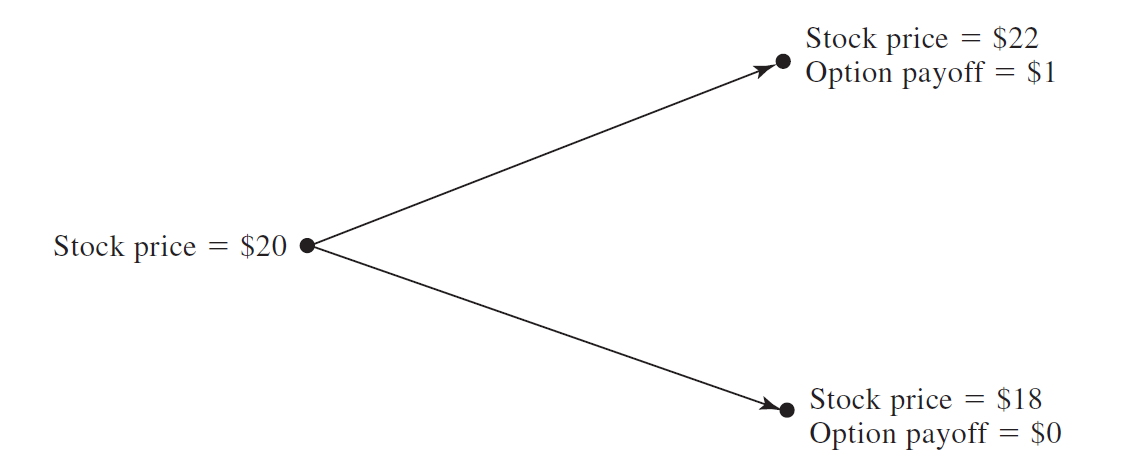

About the value of the portfolio at the end of the 3 months. We then argue that, because the portfolio has no risk, the return it earns must equal the risk-free interest rate. This enables us to work out the cost of setting up the portfolio and therefore the option’s price. Because there are two securities (the stock and the stock option) and only two possible outcomes, it is always possible to set up the riskless portfolio.

Consider a portfolio consisting of a long position in ${\Delta}$ shares of the stock and a short position in one call option (${\Delta}$ is the **Greek** capital letter “*delta*”). We calculate the value of ${\Delta}$ that makes the portfolio riskless. If the stock price moves up from *20 dollars* to 22 dollars, the value of the shares is 22${\Delta}$ and the value of the option is 1, so that the total value of the portfolio is 22${\Delta}$ **- 1**. If the stock price moves down from *20 dollars* to *18 dollars*, the value of the
shares is 18${\Delta}$ and the value of the option is zero, so that the total value of the portfolio is 18${\Delta}$. The portfolio is riskless if the value of ${\Delta}$ is chosen so that the final value of the portfolio is the same for both alternatives. This means that
 
 
 $$22{\Delta} - 1 = 18{\Delta}$$
 
 $$or$$
 
 $${\Delta} = 0.25 $$
 
 
A riskless portfolio is therefore

$Long: 0.25 shares$

$Short: 1  option$

If the stock price moves up to 22 dollars, the value of the portfolio is

$ 22 * 0.25 - 1 = 4.5 $

If the stock price moves down to 18 dollars, the value of the portfolio is

$18 * 0.25 = 4.5$

Regardless of whether the stock price moves up or down, the value of the portfolio is always *4.5* at the end of the life of the option. Riskless portfolios must, in the absence of arbitrage opportunities, earn the risk-free rate of interest. Suppose that, in this case, the risk-free rate is *4%* per annum (continuously compounded). It follows that the value of the portfolio today must be the present value of *4.5*, or


$$4.5e^{-0.04x3/12}=4.455$$

The value of the stock price today is known to be *20 dollars*. Suppose the option price is denoted by $f$. The value of the portfolio today is
$$20 * 0.25 - f = 5 - f$$
**it follows that**
$$ 5-f=4.455$$
**or**
$$ f=05.545$$
This shows that, in the absence of arbitrage opportunities, the current value of the option must be *0.545*. If the value of the option were more than *0.545*, the portfolio would cost less than *4.455* to set up and would earn more than the risk-free rate. If the value of the option were less than *0.545*, shorting the portfolio would provide a way of borrowing money at less than the risk-free rate.
Trading *0.25* shares is, of course, not possible. However, the argument is the same if we imagine selling *400* options and buying 100 shares. In general, it is necessary to buy ${\Delta}$ shares for each option sold to form a riskless portfolio. The parameter ${\Delta}$ (delta) is important in the hedging of options.

*Now we will see briefly how to create a one period binomial model in python.*



*Here's a simple Python function that creates a one-period binomial model with two possible outcomes:*

In [12]:
def binomial_model(S, u, d, p):
    """
    Returns a one-period binomial model.

    Parameters:
    S (float): initial asset price
    u (float): factor by which the asset price goes up
    d (float): factor by which the asset price goes down
    p (float): probability of an up movement

    Returns:
    (tuple): a tuple containing the following elements:
        - S_0 (float): the initial asset price
        - S_u (float): the asset price after an up movement
        - S_d (float): the asset price after a down movement
        - p (float): the probability of an up movement
    """
    S_0 = S
    S_u = S * u
    S_d = S * d
    return S_0, S_u, S_d, p

*This function takes in four parameters:*

**S**: the initial asset price
**u**: the factor by which the asset price goes up
**d**: the factor by which the asset price goes down
**p**: the probability of an up movement

It returns a tuple containing the initial asset price **(S_0)**, the asset price after an up movement **(S_u)**, the asset price after a down movement **(S_d)**, and the probability of an up movement **(p)**.

*This will output:*

**S_0 = 100, S_u = 110.0, S_d = 90.0, p = 0.5**

*You can modify the function parameters to create different one-period binomial models.*




In [13]:
S_0, S_u, S_d, p = binomial_model(100, 1.1, 0.9, 0.5)
print(f"S_0 = {S_0}, S_u = {S_u}, S_d = {S_d}, p = {p}")

S_0 = 100, S_u = 110.00000000000001, S_d = 90.0, p = 0.5


# TWO-STEP BINOMIAL TREES

A two-step binomial tree is a financial model used to describe the evolution of the price of an asset over two time periods, assuming that the asset price can move up or down in each time period by a specified factor.

In a two-step binomial tree, the asset price at time 0 is denoted by $S_0$. At the end of the first time period, the asset price can either move up to $S_1u$ with probability $p$ or move down to $S_1d$ with probability $1-p$, where $u$ and $d$ are the factors by which the asset price moves up or down, respectively.

At the end of the second time period, the asset price can either move up again to $S_2u^2$ with probability $p^2$, move down to $S_2ud$ with probability $p(1-p)$, or move down again to $S_2d^2$ with probability $(1-p)^2$.

The two-step binomial tree can be used to value options, such as European and American options, and to calculate various financial metrics, such as the expected return and volatility of the asset.

To construct a two-step binomial tree, we can extend the one-period binomial tree to two periods. We start with the initial asset price $S_0$, then compute the possible asset prices at the end of the first time period, $S_1u$ and $S_1d$, using the up and down factors $u$ and $d$. We then compute the possible asset prices at the end of the second time period, $S_2u^2$, $S_2ud$, and $S_2d^2$, using the up and down factors squared, $u^2$ and $d^2$, and the cross factor, $ud$.

The resulting two-step binomial tree will have two levels, with three nodes at the second level representing the possible asset prices at the end of the second time period. This process can be extended to any number of time periods, with each additional time period adding a level to the binomial tree.

We can extend the analysis to a two-step binomial tree such as that shown in the figure. Here the stock price starts at *20 dollars* and in each of two time steps may go up by 10% or down by 10%. Each time step is 3 months long and the risk-free interest rate is 4% per annum. We consider a 6-month option with a strike price of 21 dollars.

The objective of the analysis is to calculate the option price at the initial node of the tree. This can be done by repeatedly applying the principles established earlier in the chapter. Figure shows the same tree as in the figure , but with both the stock price and the option price at each node. (The stock price is the upper number and the option price is the lower number.) The option prices at the final nodes of the tree are easily
calculated. They are the payoffs from the option. At node **D** the stock price is $24.2$ and the option price is $24.2 - 21 = 3.2$; at nodes **E** and **F** the option is out of the money and its value is *zero*.
At node **C** the option price is zero, because node **C** leads to either node **E** or node **F** and at both of those nodes the option price is zero. We calculate the option price at node **B** by focusing our attention on the part of the tree shown in the figure.

**Stock prices in a two-step tree.**

**Figure 2.0**
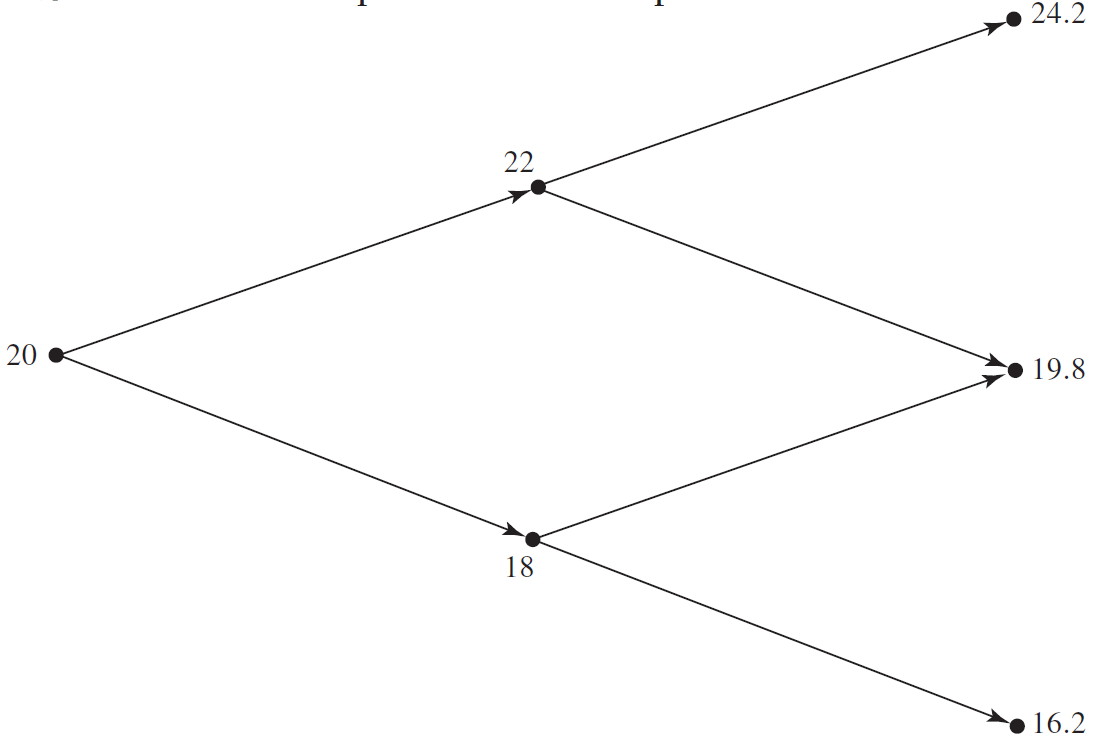

notation introduced earlier in the chapter, **u = 1.1**, **d = 0.9**, **r = 0.04**, and **T = 0.25**, sothat **p = 0.5503**, and equation (in Figure) gives the value of the option at node **B** as

$$e^{-0.04x3/12}(0.5503 x 3.2 + 0.4497 x 0) = 1.7433$$

It remains for us to calculate the option price at the initial node A. We do so by focusing on the first step of the tree. We know that the value of the option at node **B** is **1.7433** and

*Stock and option prices in a two-step tree. The upper number at each
node is the stock price and the lower number is the option price.*

**Figure 3.0**

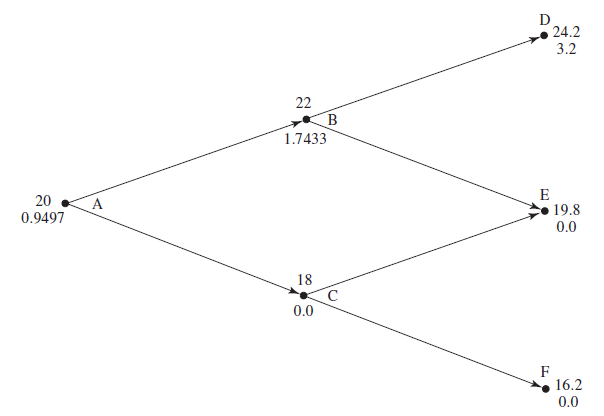


*Evaluation of option price at node **B** of Figure*

**Figure 4.0**


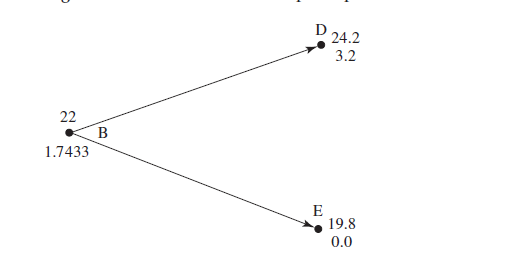

that at node **C** it is zero. Equation therefore gives the value at node **A** as

$$4.5e^{-0.04x3/12}(0.5503 x 1.7433 + 0.4497 x 0) = 0.9497$$



The value of the option is *0.9497 dollars*.
Note that this example was constructed so that u and d (the proportional up and down movements) were the same at each node of the tree and so that the time steps were of the same length. As a result, the risk-neutral probability, p, as calculated by equation is the same at each node.

***Again, Here's an example implementation of a two-period binomial tree in Python:***

In [1]:
import numpy as np

# Define the parameters of the binomial tree
S0 = 100   # Initial stock price
u = 1.1    # Up factor
d = 0.9    # Down factor
r = 0.05   # Risk-free rate
T = 2      # Time to maturity in years
n = 2      # Number of time steps

# Compute the values of the underlying asset at each node of the tree
stock_values = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(i+1):
        stock_values[j,i] = S0 * (u**j) * (d**(i-j))

# Compute the risk-neutral probabilities of moving up and down
p = (np.exp(r*T/n) - d) / (u - d)
q = 1 - p

# Compute the option values at each node of the tree
option_values = np.zeros((n+1, n+1))
for i in range(n+1):
    option_values[i,n] = max(stock_values[i,n] - 100, 0)
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_values[j,i] = np.exp(-r*T/n) * (p*option_values[j,i+1] + q*option_values[j+1,i+1])

# Print the option value at the initial node of the tree
print("Option value:", option_values[0,0])

Option value: 1.1279845090186384


*Option value: 1.1279845090186384*

This implementation uses nested loops to compute the values of the underlying asset at each node of the tree, as well as the option values at each node. It then uses these values to compute the option value at the initial node of the tree, which is the value of the option at time zero. Note that this implementation assumes a *European-style* call option with a strike price of *100*.



Now, we will understand better options with examples for *PUT option*, *American option*, and we will briefly touch on the logic of hedge, for this we need to learn *delta hedge*. Finally, we will take a look volatility with **u** and **d**.


#### A PUT EXAMPLE

The procedures described in this chapter can be used to price puts as well as calls. Consider a 2-year *European* put with a strike price of *52 dollars* on a stock whose current price is *50 dollars*. We suppose that there are two time steps of 1 year, and in each time step the stock price either moves up by 20% or* moves down by 20%*. We also suppose that the risk-free interest rate is 5%.

The tree is shown in Figure. In this case **u = 1.2**, **d = 0.8**, ${\Delta}t$ = 1, and **r = 0.05**. From equation the value of the *risk-neutral* probability, **p**, is given by

$$p=\frac{e^{0.05x1}{-0.8}}{1.2-0.8}=0.6282$$


The possible final stock prices are: *72 dollars*, *48 dollars*, and *32 dollars*. In this case,$_{uu}^{f}=0,_{ud}^{f}=4$    **and**    $_{dd}^{f}=20$. From equation.

$$f=e^{-2x0.05x1}(0.6282^2 \,x\, 0\, + 2 \,x\,\, 0.6282 \, x \,\, 0.3718 \, x \,\, 4 \,+ \, 0.3718^2 \,x\,\, 20) = 4.1923$$

The value of the put is *4.1923 dollars*. This result can also be obtained using equation

Using a two-step tree to value a *European put option*. At each node, the upper number is the stock price and the lower number is the option price.


**Figure 5.0**

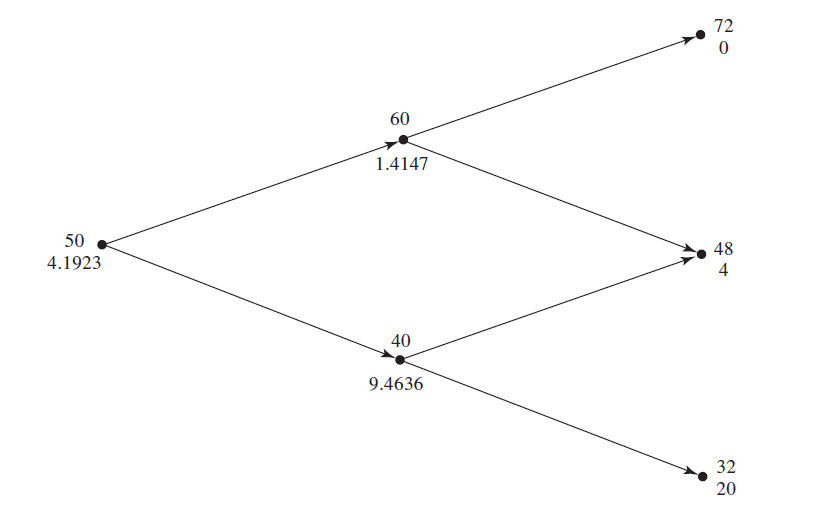



*and working back through the tree one step at a time. Figure shows the intermediate option prices that are calculated*


**Now we will make a Put example in python.**

In [2]:
import numpy as np

def binomial_tree_put(S, K, r, sigma, T, N):
    """
    Calculates the price of a European put option using a two-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            option_tree[j, i] = max(option_tree[j, i], K - stock_tree[j, i])

    return option_tree[0, 0]

# Example usage
S = 100  # initial stock price
K = 105  # strike price
r = 0.05  # risk-free interest rate
sigma = 0.2  # stock price volatility
T = 1  # time to maturity (in years)
N = 2  # number of time steps in the binomial tree

put_price = binomial_tree_put(S, K, r, sigma, T, N)
print("Put price:", put_price)

Put price: 9.088257638650122


*Put price: 9.088257638650122*

In this example, we define a function **binomial_tree_put** that takes in the parameters of the option and returns its price. The function first calculates the parameters of the binomial tree (**u, d, and p**) and then generates the stock price tree and option value tree. Finally, it backpropagates the option value tree to compute the option price at time **0**.

Note that this implementation assumes that the option is **European** (i.e., it can only be exercised at expiration). If you want to implement an **American option** (which can be exercised at any time), you'll need to modify the backpropagation step to take into account the possibility of early exercise. we will implement an american option after american option study.

#### AMERICAN OPTIONS

Up to now all the options we have considered have been European. We now move on to consider how American options can be valued using a binomial tree such as that in
Figures. The procedure is to work back through the tree from the end to the beginning, testing at each node to see whether early exercise is optimal. The value of the
option at the final nodes is the same as for the European option. At earlier nodes the value of the option is the greater of


$1.\ The\ value\ given\ by\ equation\\$
$2.\ The\ payoff \ from \  early\ exercise.$



*Figure 6.0* shows how *Figure 5.0* is affected if the option under consideration isAmerican rather than European. The stock prices and their probabilities are
unchanged. The values for the option at the final nodes are also unchanged. At node **B**, equation (figure 3.0) gives the value of the option as *1.4147*, whereas the payoff
from early exercise is negative *1= -82.* Clearly early exercise is not optimal at node B, and the value of the option at this node is 1.4147. At node **C**, equation (figure 3.0) gives the value of the option as 9.4636, whereas the payoff from early exercise is 12. In this case, early exercise is optimal and the value of the option at the node is *12.* At the initial node **A**, the value given by equation (figure 3.0) is

$$e^{-0.05x1}(0.6282 \ x \ 1.4147\,\ +\ 12.0) = 5.0894$$

Using a *two-step tree* to value an American put option. At each node, the upper number is the stock price and the lower number is the option price

**Figure 6.0**

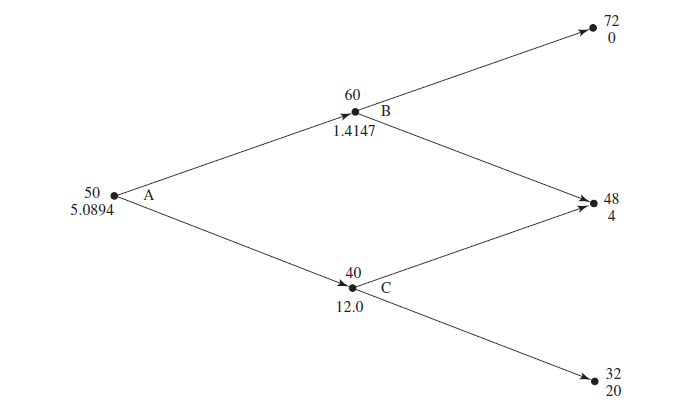

and the payoff from early exercise is 2. In this case early exercise is not optimal. The value of the option is therefore *5.0894 dollars*.

**Now, Let's have a pyhton exercise**


> here's an example of how to implement a two-step binomial tree for an American put option with the same exercise parameters as the European put option example I provided earlier:


In [3]:
import numpy as np

def binomial_tree_american_put(S, K, r, sigma, T, N):
    """
    Calculates the price of an American put option using a two-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            exercise_value = K - stock_tree[j, i]
            hold_value = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            option_tree[j, i] = max(exercise_value, hold_value)

    return option_tree[0, 0]

# Example usage
S = 100  # initial stock price
K = 105  # strike price
r = 0.05  # risk-free interest rate
sigma = 0.2  # stock price volatility
T = 1  # time to maturity (in years)
N = 2  # number of time steps in the binomial tree

put_price = binomial_tree_american_put(S, K, r, sigma, T, N)
print("Put price:", put_price)

Put price: 9.088257638650122


*Put price: 9.088257638650122*

In this example, we define a function **binomial_tree_american_put** that calculates the price of an American put option using a **two-step binomial tree**. The difference from the* European put option* implementation is in the backpropagation step: we now compute the option value at each node as the maximum between the exercise value (i.e., the payoff if the option were exercised at this node) and the hold value (i.e., the expected value of holding the option at this node and exercising it later).

Note that the **American put option price** may differ from the *European put* option price when interest rates are positive. In this case, the option holder may exercise the option early to avoid the opportunity cost of holding the option.


*Now, I will introduce and briefly talk about one of the most exciting and important topics, because hedge has a long-term subject, so we will briefly introduce it and learn its basic logic. Later, I will open a topic with a different event where I will explain hedge strategies. (delta, gamma, knock-out, theta)*


## DELTA

$$ Delta = \Delta$$

At this stage, it is appropriate to introduce delta, an important parameter (**sometimes referred to as a “Greek letter” or simply a “Greek”**) in the pricing and hedging of
options.

At this stage, it is appropriate to introduce delta, an important parameter (**sometimes referred to as a “Greek letter” or simply a “Greek”**) in the pricing and hedging of
options. The delta $(\Delta)$ of a stock option is the ratio of the change in the price of the stock option to the change in the price of the underlying stock. It is the number of units of the stock we should hold for each option shorted in order to create a riskless portfolio. It is the same as the $\Delta$ introduced earlier in this chapter. The construction of a riskless portfolio is sometimes referred to as delta hedging. The delta of a call option is positive, whereas the delta of a put option is negative.

From Figure 1.0, we can calculate the value of the **delta** of the **call option** being considered as

$$ \frac{1-0}{22-18}=0.25$$

This is because when the stock price changes from *18 dollars* to *22 dollars*, the option price changes from *0 dollars* to *1 dollars*. (This is also the value of $\Delta$ calculated *in Section 1.0.*)

In Figure 4.0 the **delta** corresponding to stock price movements over the first time step is

$$\frac{1.7433-0}{22-18}=0.4358$$


*  The **delta** for stock price movements over the second time step is

$$\frac{3.2-0}{24.2-19.8}=0.7273$$


* if there is an upward movement over the first time step, and

$$\frac{0-0}{19.8-16.2}=0$$

* if there is a downward movement over the first time step.
From Figure 6.8, **delta** is

$$\frac{1.4147-94636}{60-40}=0.4024$$

* at the end of the first time step, and either

$$\frac{0-4}{772-48}=-0.1667  \\\\\\\  \\OR\\\ \\\\\\ \frac{4-20}{48-32}=-1.000$$


at the end of the second time step.

The two-step examples show that delta changes over time. (In Figure 3.0, **delta** changes from *0.4358* to either *0.7273 or 0*; and, in Figure 6.0, it changes from *-0.4024* to either *-0.1667 or -1.0000*.) Thus, in order to maintain a riskless **hedge** using an option and the underlying stock, we need to adjust our holdings in the stock periodically.


**Finally, I would like to demonstrate briefly in a very simple python exercise, and for this I will use the black-scholes formula, then I will explain the black-scholes logic in detail.**




*Here's an example of how to implement a delta hedge for a European call option in Python:*

In [5]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, r, sigma, T):
    """
    Calculates the price of a European call option using the Black-Scholes formula.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)

    Returns:
        (float) price of the call option
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def delta(S, K, r, sigma, T):
    """
    Calculates the delta of a European call option using the Black-Scholes formula.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)

    Returns:
        (float) delta of the call option
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_hedge_call(S, K, r, sigma, T, N):
    """
    Simulates a delta hedge for a European call option using a binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) total profit and loss of the delta hedge
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    for j in range(N+1):
        option_tree[j, N] = max(stock_tree[j, N] - K, 0)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])

    # Simulate the delta hedge
    hedge = []
    stock_position = delta(S, K, r, sigma, T)
    option_price = option_tree[0, 0]
    hedge.append(-option_price)
    for i in range(1, N+1):
        stock_price = stock_tree[0, i]

The code is designed to simulate a delta hedge for a **European call option** using a **binomial tree**. The **delta hedge** is a strategy where the trader buys or sells a certain number of shares of the underlying stock to offset the change in the value of the option due to changes in the stock price. The goal of the **delta hedge** is to eliminate the risk associated with the option's price, while still maintaining the potential for profit.

The code starts by defining two functions: **black_scholes_call** and **delta**. The **black_scholes_call** function calculates the price of a European call option using the **Black-Scholes** formula, while the delta function calculates the **delta of the option**. These functions are used to determine the initial stock price, option price, and **delta** for the option.

Next, **the delta_hedge_call** function is defined. This function takes in several parameters, including the initial stock price, *strike price*, **risk-free interest rate**, stock price volatility, time to maturity, and the number of time steps in the **binomial tree**. It then generates a binomial tree to simulate the stock price over time.

The function then generates a second tree to calculate the option values at each time step. The option value tree is calculated using the **Black-Scholes** formula and the **delta function** to calculate the option price at each node in the tree.

The function then simulates the **delta hedge** by calculating the number of shares of the underlying stock to buy or sell at each time step to maintain a **delta-neutral** position. The hedge is initially set up by buying or selling an amount of the underlying stock equal to the negative value of the option.

Finally, the function calculates the total profit and loss of the **delta hedge** by summing up the profits and losses from each time step.

> I hope this explanation helps. Let me know if you have any further questions or if there's anything else you'd like me to explain.

## THE BINOMIAL TREE FORMULAS

Binomial tree formulas are used in finance to price various types of options, such as European and American options. The binomial model assumes that there are only two possible outcomes for the price of the underlying asset: it can either go up or go down by a certain amount at each time step. The binomial tree is a visual representation of the possible outcomes and the probabilities associated with each outcome.

*Here are some important formulas used in the binomial tree model:*


**1.** Probability of an up move: This is denoted by "p" and is calculated using the following formula:

$p = (e^(r * Δt) - d) / (u - d)$

**where:**

* $r$ = risk-free interest rate
* $Δt$ = time between each step in the tree
* $u$ = factor by which the asset price increases in an up move
* $d$ = factor by which the asset price decreases in a down move

**2.** Probability of a down move: This is denoted by $"1 - p".$

**3.** Asset price at a node: This is denoted by $S$ and is calculated using the following formula:

$S = S0 * u^k * d^(n - k)$

**where:**

* $S0$ = initial asset price
* $k$ = number of up moves
* $n$ = total number of time steps

Option price at a node: This is denoted by $"C"$ and is calculated using the following formula:

$C = e^(-r * Δt) * (p * Cu + (1 - p) * Cd)$

**where:**

* $Cu$ = option price in an up move
* $Cd$ = option price in a down move

**5.** Option price at expiry: This is denoted by $"Cn"$ and is simply the intrinsic value of the option at expiry.

These formulas can be used to construct the binomial tree and calculate the option price at any point in the tree. The final option price is obtained by working backwards from the expiry node to the root node of the tree.

> Here I have explained the basic logic of binomial trees formulas for you to understand very simply, now I will show the formulas in the literature with examples and explain the logic again, then I will show you how I examine it in python.





The analysis in the previous section shows that, when the length of the time step on a binomial tree is $\Delta$t, we should match volatility by setting.

$$u=e^{\sigma\sqrt{\Delta{t}}}$$

$$and$$

$$d=e^{\sigma\sqrt{\Delta{t}}}$$

$$and$$

$$p =\frac{a-d}{u-d}=-0.1667$$

$$where$$

$$a=e^{r{\Delta{t}}}$$


> Finally, we will solve an example and better understand the formulas.> 

Consider again the American put option , where the stock price is *50 dollars*, the strike price is *52 dollars*, the risk-free rate is *5%*, the life of the option is *2 years*, and there are two time steps. In this case, $\Delta{t}=1$. Suppose that the volatility $\sigma$ is *30%*. Then we have :  

$$ \\ u=e^{0.3x1}=1.3499, \\ d=\frac{1}{1.3499}=0.7408,\\  u=e^{0.05x1}=1.0513\\ $$

$$and$$

$$p=\frac{1.0513-0.7408}{1.3499-0.7408}=0.5097$$

The tree is shown in Figure 6.0 The value of the put option is 7.43, $u$=1.2 and $d$=0.8,Note that the option is exercised at the end of the first time step if the lower node is reached.


> Let's have exercise in python;> 



                           S  
                       /       \
                     /           \
                   /               \
                 Su=1.8188          Sd=0.8894
                /     \             /     \
               /       \           /       \
             Suu=2.4541 Sud=1.2000 Sdd=0.6568 Sdu=1.2000
             
In this example, **"S"** is the initial stock price, and **"u"** and **"d"** are the up and down factors, respectively. **"a"** is not used in the construction of the tree, but **"p"** is used to calculate the probabilities of moving up and down in each time step.

Starting at the top of the tree, we can see that the stock price can either move up to **Su=1.8188** or down to **Sd=0.8894** in the first time step. In the second time step, the stock price can either move up to **Suu=2.4541** or down to **Sud=1.2000** if it moved up in the first step, or move up to **Sdu=1.2000** or down to **Sdd=0.6568** if it moved down in the first step.

Using the binomial tree formulas, we can calculate the option price at each node in the tree and work backwards from the final nodes to the root node to obtain the fair value of the option.

            
     here's an example of how to implement a binomial tree in Python with the given values:


In [1]:
import numpy as np

# Define the input values
S0 = 100      # Initial stock price
u = 1.3499    # Up factor
d = 0.7408    # Down factor
a = 1.0513    # N/A
p = 0.5097    # Probability of up move

# Define the number of time steps and initialize the stock price tree
n = 3
stock_tree = np.zeros((n+1, n+1))
stock_tree[0, 0] = S0

# Fill in the stock price tree
for i in range(1, n+1):
    for j in range(i+1):
        stock_tree[j, i] = S0 * u**(i-j) * d**j

# Print the stock price tree
print("Stock price tree:")
print(stock_tree)

# Initialize the option price tree
option_tree = np.zeros((n+1, n+1))

# Fill in the option price tree at the final nodes
for j in range(n+1):
    option_tree[j, n] = max(stock_tree[j, n] - 100, 0)

# Work backwards through the tree to calculate the option prices at each node
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_tree[j, i] = np.exp(-0.06 * 1/3) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])

# Print the option price tree
print("Option price tree:")
print(option_tree)

Stock price tree:
[[100.         134.99       182.223001   245.98282905]
 [  0.          74.08       100.000592   134.99079914]
 [  0.           0.          54.878464    74.08043855]
 [  0.           0.           0.          40.65396613]]
Option price tree:
[[ 30.79729065  53.24146579  89.75035926 145.98282905]
 [  0.           8.73396303  17.48165742  34.99079914]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]


This code creates a 3-period binomial tree for a **American put option** on a stock with an initial *price of 100*. It then calculates the stock prices at each node in the tree and uses the binomial tree formulas to calculate the option prices at each node, working backwards from the final nodes to the root node. The option price tree is printed at the end.

Note that the code assumes a risk-free interest rate of 6% and a time to maturity of 1/3 year. *You can modify these values as needed*.

*Before I finish the study, I would like to give a brief information about RISK-NEUTRAL VALUATION because this is an important issue for the binomial tree and Black-Scholes model.*



## RISK-NEUTRAL VALUATION

***here's an overview of risk-neutral valuation:***

Risk-neutral valuation is a concept used in financial mathematics to determine the fair value of a derivative security, such as an option or a futures contract. The basic idea is to assume that market participants are indifferent to risk and that they require no extra return for taking on additional risk. This is known as the risk-neutral assumption.

Under the risk-neutral assumption, the expected rate of return on any security is equal to the risk-free rate of return. In other words, the market price of risk is zero. This assumption allows us to calculate the expected value of a derivative security using a probability measure that is different from the real-world probability measure.

The probability measure used in risk-neutral valuation is called the risk-neutral probability measure, and it is constructed by adjusting the real-world probability measure to account for the market price of risk. The risk-neutral probability measure assigns probabilities to the various possible future states of the world in such a way that the expected rate of return on any security is equal to the risk-free rate.

Once the risk-neutral probability measure is constructed, the fair value of a derivative security can be calculated using the discounted expected value of its future cash flows under the risk-neutral probability measure. This calculation is typically performed using a binomial tree or a Black-Scholes model.

The main advantage of risk-neutral valuation is that it allows us to price complex financial instruments using simple and intuitive models. This approach is widely used in the financial industry, especially for pricing options and other derivatives, and it forms the foundation of modern quantitative finance.


We are now in a position to introduce a very important principle in the pricing of derivatives known as risk-neutral valuation. This states that, when valuing a derivative,
we can make the assumption that investors are risk-neutral. This assumption means investors do not increase the expected return they require from an investment to
compensate for increased risk. A world where investors are risk-neutral is referred to as a risk-neutral world. The world we live in is, of course, not a risk-neutral world. The higher the risks investors take, the higher the expected returns they require. However, it turns out that assuming a risk-neutral world gives us the right option price for the world we live in, as well as for a risk-neutral world. Almost miraculously, it finesses the problem that we know hardly anything about the risk aversion of the buyers and sellers of options.

Risk-neutral valuation seems a surprising result when it is first encountered. Options are risky investments. Should not a person’s risk preferences affect how they are priced? The answer is that, when we are pricing an option in terms of the price of the underlying stock, risk preferences are unimportant. As investors become more riskaverse, stock prices decline, but the formulas relating option prices to stock prices remain the same.

*A risk-neutral world has two features that simplify the pricing of derivatives:*

* The expected return on a stock (or any other investment) is the risk-free rate.
* The discount rate used for the expected payoff on an option (or any other instrument)is the risk-free rate.

the parameter **p** should be interpreted as the probability of an up movement in a **risk-neutral** world, so that **1 - p** is the probability of a down movement in this world.

**We assume**,   $$u>e^{rT},\ so\ that\ 0<p<1$$

**The expression**

$$p_{u}^{f}+(1-p)_{d}^{f}$$

is the expected future payoff from the option in a risk-neutral world and equation states that the value of the option today is its expected future payoff in a **risk-neutral**  world discounted at the **risk-free rate**. This is an application of **risk-neutral** valuation.




> here's an example in Python that demonstrates how to use **risk-neutral** valuation to price a European call option using a binomial tree:

In [2]:
import numpy as np

# Define the input values
S0 = 100      # Initial stock price
u = 1.2       # Up factor
d = 0.8       # Down factor
r = 0.05      # Risk-free interest rate
T = 1         # Time to maturity (in years)
K = 105       # Strike price

# Define the number of time steps and initialize the stock price tree
n = 3
dt = T / n
stock_tree = np.zeros((n+1, n+1))
stock_tree[0, 0] = S0

# Fill in the stock price tree
for i in range(1, n+1):
    for j in range(i+1):
        stock_tree[j, i] = S0 * u**(i-j) * d**j

# Initialize the option price tree
option_tree = np.zeros((n+1, n+1))

# Fill in the option price tree at the final nodes
for j in range(n+1):
    option_tree[j, n] = max(stock_tree[j, n] - K, 0)

# Work backwards through the tree to calculate the option prices at each node
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_tree[j, i] = np.exp(-r * dt) * (u * option_tree[j, i+1] + d * option_tree[j+1, i+1]) / 2

# Print the option price at time 0
print("Option price:", option_tree[0, 0])

Option price: 18.122062012047994


This code uses a binomial tree to model the evolution of the stock price over three time steps. It then uses risk-neutral valuation to calculate the fair value of a European call option with a strike price of 105. The code assumes a risk-free interest rate of 5% and uses the binomial tree formulas to calculate the option prices at each node in the tree, working backwards from the final nodes to the root node. The option price at time 0 is printed at the end.

Note that this is a simple example and does not take into account factors such as dividends or volatility. However, it illustrates the basic idea of risk-neutral valuation and how it can be used to price derivative securities.

**REAL-WORLD VS. RISK-NEUTRAL PROCESSES**

Real-world and risk-neutral processes are two different ways of modeling the dynamics of financial markets.

The real-world process is a way of modeling the actual behavior of financial markets, which can be unpredictable and subject to a wide range of factors, including economic events, political developments, and changes in investor sentiment. In this process, the probabilities of various future states of the world are determined by analyzing past trends and current conditions. This approach attempts to capture the complex and often unpredictable behavior of financial markets.

The **risk-neutral process**, on the other hand, is a theoretical construct that assumes that market participants are indifferent to risk and that they require no extra return for taking on additional risk. Under this process, the expected rate of return on any security is equal to the **risk-free** rate of return, and the probabilities of various future states of the world are determined by adjusting the **real-world** probabilities to account for the market price of risk.

The main advantage of the **risk-neutral** process is that it allows us to use simple and intuitive models, such as the **Black-Scholes** model, to price complex financial instruments, such as options and other derivatives. These models can be used to calculate the fair value of these instruments, which is essential for trading and risk management.

However, it's important to note that the risk-neutral process is a theoretical construct and does not necessarily reflect the actual behavior of financial markets. In practice, market participants are not always indifferent to risk, and the probabilities of future events can be difficult to determine with accuracy.

Therefore, while **risk-neutral** valuation is a powerful tool for pricing complex financial instruments, it's important to keep in mind that it is a simplification of the real-world process and should be used with caution, particularly when dealing with **large-scale** or **high-risk** financial transactions.




### *That's all I want to tell about the Binomial Tree and what I want to show you briefly in Python, the formulas we see here represent the formulas in the literature and applied. I wanted to explain briefly and simply, and I also wanted to show them with examples in python. The Python codes and other basic binomial tree formulas we see here form the basis of Arbitrage logic.*

$$Reference$$

$$\boldsymbol{John\ C.\ Hull}$$